# MODEL A
## Four spectral breaks using HE data by IceTop (Sibyll 2.1) 

In [242]:
from pylab import *
from scipy.optimize import minimize
from scipy import interpolate

In [243]:
m_p = 0.938 # Proton mass
Z = 1 # Proton charge
n = 1 # Number of nucleons in H

## Load data

In [259]:
data_PAMELA_H = np.genfromtxt("Data/Proton/PAMELA_H_data.txt")
R_PAMELA = data_PAMELA_H[:,1]
E_PAMELA = (R_PAMELA * Z) - m_p
flux_R_PAMELA = data_PAMELA_H[:,3]
flux_PAMELA = flux_R_PAMELA * (R_PAMELA / ((Z * R_PAMELA) - m_p)) # Normalize to Ek
error_PAMELA_stat = data_PAMELA_H[:,4] * (R_PAMELA / ((Z * R_PAMELA) - m_p)) # Normalize to Ek
error_PAMELA_syst = data_PAMELA_H[:,5] * (R_PAMELA / ((Z * R_PAMELA) - m_p)) # Normalize to Ek
error_PAMELA = np.sqrt(error_PAMELA_stat**2 + error_PAMELA_syst**2) 

# Consider E > 50 GeV
index_PAMELA = np.where(np.logical_and(E_PAMELA>=5e1, E_PAMELA<=1e5))
E_PAMELA = E_PAMELA[index_PAMELA]; flux_PAMELA = flux_PAMELA[index_PAMELA]; error_PAMELA = error_PAMELA[index_PAMELA]
print('PAMELA')
print('Number of data points:', len(E_PAMELA))

PAMELA
Number of data points: 21


In [260]:
data_AMS02_H = np.genfromtxt("Data/Proton/AMS02_H_data.txt")
R_AMS02 = data_AMS02_H[:,1]
E_AMS02 = (R_AMS02 * Z) - m_p
flux_R_AMS02 = data_AMS02_H[:,3]
flux_AMS02 = flux_R_AMS02 * (R_AMS02 / ((Z * R_AMS02) - m_p)) # Normalize to Ek
error_AMS02_stat = data_AMS02_H[:,4] * (R_AMS02 / ((Z * R_AMS02) - m_p)) # Normalize to Ek
error_AMS02_syst = data_AMS02_H[:,5] * (R_AMS02 / ((Z * R_AMS02) - m_p)) # Normalize to Ek
error_AMS02 = np.sqrt(error_AMS02_stat**2 + error_AMS02_syst**2)

# Consider E > 50 GeV
index_AMS02 = np.where(np.logical_and(E_AMS02>=5e1, E_AMS02<=1e5))
E_AMS02 = E_AMS02[index_AMS02]; flux_AMS02 = flux_AMS02[index_AMS02]; error_AMS02 = error_AMS02[index_AMS02]
print('AMS02')
print('Number of data points:', len(E_AMS02))

AMS02
Number of data points: 29


In [261]:
data_DAMPE_H = np.genfromtxt("Data/Proton/DAMPE_H_data.txt")
E_DAMPE = data_DAMPE_H[:,1]
flux_DAMPE = data_DAMPE_H[:,3]
error_DAMPE_stat = data_DAMPE_H[:,4]
error_DAMPE_syst = data_DAMPE_H[:,5]
error_DAMPE = np.sqrt(error_DAMPE_stat**2 + error_DAMPE_syst**2)

# Consider E > 50 GeV
index_DAMPE = np.where(np.logical_and(E_DAMPE>=5e1, E_DAMPE<=1e5))
E_DAMPE = E_DAMPE[index_DAMPE]; flux_DAMPE = flux_DAMPE[index_DAMPE]; error_DAMPE = error_DAMPE[index_DAMPE]
print('DAMPE')
print('Number of data points:', len(E_DAMPE))

DAMPE
Number of data points: 16


In [262]:
data_CALET_H = np.genfromtxt("Data/Proton/CALET_H_data.txt")
E_CALET = data_CALET_H[:,1]
flux_CALET = data_CALET_H[:,3]
error_CALET_stat = data_CALET_H[:,4]
error_CALET_syst_low = data_CALET_H[:,5]
error_CALET_syst_up = data_CALET_H[:,6]
error_CALET_low = np.sqrt(error_CALET_stat**2 + error_CALET_syst_low**2)
error_CALET_up = np.sqrt(error_CALET_stat**2 + error_CALET_syst_up**2)

# Consider E > 50 GeV
index_CALET = np.where(np.logical_and(E_CALET>=5e1, E_CALET<=1e5))
E_CALET = E_CALET[index_CALET]; flux_CALET = flux_CALET[index_CALET]; error_CALET_low = error_CALET_low[index_CALET]; error_CALET_up = error_CALET_up[index_CALET]
print('CALET')
print('Number of data points:', len(E_CALET))

CALET
Number of data points: 23


In [263]:
data_CREAM_H = np.genfromtxt("Data/Proton/CREAM_H_data.txt")
E_CREAM = data_CREAM_H[:,1] * n
flux_CREAM = data_CREAM_H[:,3] / n
error_CREAM_stat_low = data_CREAM_H[:,4] / n
error_CREAM_stat_up = data_CREAM_H[:,5] / n
error_CREAM_syst = data_CREAM_H[:,6] / n
error_CREAM_low = np.sqrt(error_CREAM_stat_low**2 + error_CREAM_syst**2)
error_CREAM_up = np.sqrt(error_CREAM_stat_up**2 + error_CREAM_syst**2)

# Consider E > 50 GeV
index_CREAM = np.where(np.logical_and(E_CREAM>=5e1, E_CREAM<=5e5))
E_CREAM = E_CREAM[index_CREAM]; flux_CREAM = flux_CREAM[index_CREAM]; error_CREAM_low = error_CREAM_low[index_CREAM]; error_CREAM_up = error_CREAM_up[index_CREAM]
print('CREAM')
print('Number of data points:', len(E_CREAM))

CREAM
Number of data points: 12


In [264]:
data_ATIC_H = np.genfromtxt("Data/Proton/ATIC_H_data.txt")
E_ATIC = data_ATIC_H[:,1] - m_p
flux_ATIC = data_ATIC_H[:,3] * (E_ATIC / (E_ATIC - m_p)) # Normalize to Ek
error_ATIC_stat = data_ATIC_H[:,4] * (E_ATIC / (E_ATIC - m_p)) # Normalize to Ek
error_ATIC_syst = data_ATIC_H[:,3]*0.2 * (E_ATIC / (E_ATIC - m_p)) # Estimated systemtaic error of 20%
error_ATIC = np.sqrt(error_ATIC_stat**2 + error_ATIC_syst**2)

# Consider E > 50 GeV
index_ATIC = np.where(np.logical_and(E_ATIC>=5e1, E_ATIC<=1e5))
E_ATIC = E_ATIC[index_ATIC]; flux_ATIC = flux_ATIC[index_ATIC]; error_ATIC = error_ATIC[index_ATIC]
print('ATIC')
print('Number of data points:', len(E_ATIC))

ATIC
Number of data points: 14


In [265]:
data_GRAPES_H = np.genfromtxt("Data/Proton/GRAPES_H_data.txt")
E_GRAPES = data_GRAPES_H[:,0] - m_p
flux_GRAPES = data_GRAPES_H[:,2] * (E_GRAPES / (E_GRAPES - m_p)) # Normalize to Ek
error_GRAPES_stat = data_GRAPES_H[:,3] * (E_GRAPES / (E_GRAPES - m_p)) # Normalize to Ek
error_GRAPES_syst_low = data_GRAPES_H[:,5] * (E_GRAPES / (E_GRAPES - m_p)) # Normalize to Ek
error_GRAPES_syst_up = data_GRAPES_H[:,4] * (E_GRAPES / (E_GRAPES - m_p)) # Normalize to Ek
error_GRAPES_low = np.sqrt(error_GRAPES_stat**2 + error_GRAPES_syst_low**2)
error_GRAPES_up = np.sqrt(error_GRAPES_stat**2 + error_GRAPES_syst_up**2)

# Consider E > 50 GeV
index_GRAPES = np.where(np.logical_and(E_GRAPES>=5e1, E_GRAPES<=1e7))
E_GRAPES = E_GRAPES[index_GRAPES]; flux_GRAPES = flux_GRAPES[index_GRAPES]; error_GRAPES_low = error_GRAPES_low[index_GRAPES]; error_GRAPES_up = error_GRAPES_up[index_GRAPES]
print('GRAPES-3')
print('Number of data points:', len(E_GRAPES))

GRAPES-3
Number of data points: 8


In [266]:
data_ICECUBE_H = np.genfromtxt("Data/Proton/ICECUBE_H_data.txt")
E_ICECUBE = data_ICECUBE_H[:,1] - m_p
flux_ICECUBE = data_ICECUBE_H[:,3] * (E_ICECUBE / (E_ICECUBE - m_p)) # Normalize to Ek
error_ICECUBE_stat_low = data_ICECUBE_H[:,4] * (E_ICECUBE / (E_ICECUBE - m_p)) # Normalize to Ek
error_ICECUBE_stat_up = data_ICECUBE_H[:,4] * (E_ICECUBE / (E_ICECUBE - m_p)) # Normalize to Ek
error_ICECUBE_syst_low = data_ICECUBE_H[:,4] * (E_ICECUBE / (E_ICECUBE - m_p)) # Normalize to Ek
error_ICECUBE_syst_up = data_ICECUBE_H[:,4] * (E_ICECUBE / (E_ICECUBE - m_p)) # Normalize to Ek
error_ICECUBE_low = np.sqrt(error_ICECUBE_stat_low**2 + error_ICECUBE_syst_low**2)
error_ICECUBE_up = np.sqrt(error_ICECUBE_stat_up**2 + error_ICECUBE_syst_up**2)

# Consider E > 50 GeV
index_ICECUBE = np.where(np.logical_and(E_ICECUBE>=5e1, E_ICECUBE<=1e9))
E_ICECUBE = E_ICECUBE[index_ICECUBE]; flux_ICECUBE = flux_ICECUBE[index_ICECUBE]; error_ICECUBE_low = error_ICECUBE_low[index_ICECUBE]; error_ICECUBE_up = error_ICECUBE_up[index_ICECUBE]
print('IceTop')
print('Number of data points:', len(E_ICECUBE))

IceTop
Number of data points: 20


In [267]:
data_KASCADE_H_2005GQS = np.genfromtxt("Data/Proton/KASCADE_H_data_QGSJet01.txt")
E_KASCADE_2005GQS = data_KASCADE_H_2005GQS[:,1] - m_p
flux_KASCADE_2005GQS = data_KASCADE_H_2005GQS[:,3] * (E_KASCADE_2005GQS / (E_KASCADE_2005GQS - m_p)) # Normalize to Ek
error_KASCADE_2005GQS = data_KASCADE_H_2005GQS[:,4]  * (E_KASCADE_2005GQS / (E_KASCADE_2005GQS - m_p)) # Normalize to Ek

In [268]:
data_KASCADE_H_2005Sibyll = np.genfromtxt("Data/Proton/KASCADE_H_data_Sibyll2.1.txt")
E_KASCADE_2005Sibyll = data_KASCADE_H_2005Sibyll[:,1] - m_p
flux_KASCADE_2005Sibyll = data_KASCADE_H_2005Sibyll[:,3] * (E_KASCADE_2005Sibyll / (E_KASCADE_2005Sibyll - m_p)) # Normalize to Ek
error_KASCADE_2005Sibyll_low = data_KASCADE_H_2005Sibyll[:,4] * (E_KASCADE_2005Sibyll / (E_KASCADE_2005Sibyll - m_p)) # Normalize to Ek
error_KASCADE_2005Sibyll_up = data_KASCADE_H_2005Sibyll[:,5] * (E_KASCADE_2005Sibyll / (E_KASCADE_2005Sibyll - m_p)) # Normalize to Ek

In [269]:
data_KASCADE_H_2011GQS = np.genfromtxt("Data/Proton/KASCADE_H_data_QGSJet2.txt")
E_KASCADE_2011GQS = (data_KASCADE_H_2011GQS[:,0] / 1e9) - m_p
flux_KASCADE_2011GQS = (data_KASCADE_H_2011GQS[:,1] * 1e9) * (E_KASCADE_2011GQS / (E_KASCADE_2011GQS - m_p)) # Normalize to Ek
error_KASCADE_2011GQS_low = (data_KASCADE_H_2011GQS[:,2] * 1e9) * (E_KASCADE_2011GQS / (E_KASCADE_2011GQS - m_p)) # Normalize to Ek
error_KASCADE_2011GQS_up = (data_KASCADE_H_2011GQS[:,3]* 1e9) * (E_KASCADE_2011GQS / (E_KASCADE_2011GQS - m_p)) # Normalize to Ek

# Consider E > 50 GeV
index_KASCADE_2011GQS = np.where(np.logical_and(E_KASCADE_2011GQS>=5e1, E_KASCADE_2011GQS<=1e9))
E_KASCADE_2011GQS = E_KASCADE_2011GQS[index_KASCADE_2011GQS]; flux_KASCADE_2011GQS = flux_KASCADE_2011GQS[index_KASCADE_2011GQS]
error_KASCADE_2011GQS_low = error_KASCADE_2011GQS_low[index_KASCADE_2011GQS]; error_KASCADE_2011GQS_up = error_KASCADE_2011GQS_up[index_KASCADE_2011GQS]
print('KASCADE')
print('Number of data points:', len(E_KASCADE_2011GQS))

KASCADE
Number of data points: 20


## Model

In [270]:
def Phi_A(E, K, E0, alpha1, alpha2, alpha3, alpha4, alpha5, omega1, omega2, omega3, omega4, Eb1, Eb2, Eb3, Eb4):
    delta1 = alpha2 - alpha1
    delta2 = alpha3 - alpha2
    delta3 = alpha4 - alpha3
    delta4 = alpha5 - alpha4
    return K * (E / E0)**(-alpha3) * (1 + (E / Eb1)**(1 / omega1))**(-delta1 * omega1) * (1 + (E / Eb2)**(1 / omega2))**(-delta2 * omega2) * (1 + ((E/1e6) / Eb3)**(1 / omega3))**(-delta3 * omega3) * (1 + ((E/1e6) / Eb4)**(1 / omega4))**(-delta4 * omega4)

## Fitting using IceTop data

In [297]:
# Joint chi^2
def Chi_A(parameters):
    K, alpha3, alpha4, alpha5, omega3, omega4, Eb3, Eb4 = parameters
    
    E = np.append( np.append( np.append( np.append( np.append( np.append( np.append(E_PAMELA, E_AMS02), E_ATIC ), E_CREAM), E_CALET), E_DAMPE), E_GRAPES), E_ICECUBE)
    Flux = np.append( np.append( np.append( np.append( np.append( np.append( np.append(flux_PAMELA, flux_AMS02), flux_ATIC ), flux_CREAM), flux_CALET), flux_DAMPE), flux_GRAPES), flux_ICECUBE)
    Sigma = np.append( np.append( np.append( np.append( np.append( np.append( np.append(2*error_PAMELA, 2*error_AMS02), 2*error_ATIC ), error_CREAM_low+error_CREAM_up), error_CALET_low+error_CALET_up), 2*error_DAMPE), error_GRAPES_low+error_GRAPES_up), error_ICECUBE_low+error_ICECUBE_up)
    
    E0 = 0.1 * 1e3 #GeV
    alpha1 = 2.805
    alpha2 = 2.56
    omega1 = 0.28
    omega2 = 0.163
    Eb1 = 0.670 * 1e3 #GeV
    Eb2 = 16 * 1e3 #GeV
    
    Phi_model = Phi_A(E, K, E0, alpha1, alpha2, alpha3, alpha4, alpha5, omega1, omega2, omega3, omega4, Eb1, Eb2, Eb3, Eb4)
    
    return sum( (Phi_model - Flux)**2 / Sigma**2 ) 

In [298]:
# Initial guesses
K_bestfit = 4.46 * 10**(-2) #(GeV m2 s sr)-1
alpha3_bestfit = 2.874
alpha4_bestfit = 2.7
alpha5_bestfit = 3.1
omega3_bestfit = 0.1
omega4_bestfit = 0.1
Eb3_bestfit = 0.2  #TeV
Eb4_bestfit = 3 #PeV

# Minimization of chi^2
output = minimize(Chi_A, (K_bestfit, alpha3_bestfit, alpha4_bestfit, alpha5_bestfit, omega3_bestfit, omega4_bestfit, Eb3_bestfit, Eb4_bestfit), method='L-BFGS-B')
best_fit_values = output['x']
print('Success:', output['success'])

Success: True


In [299]:
# Best fit values
print('MY BEST FIT VALUES:')
# Normalization
print('K:', round(best_fit_values[0],7)); 
# Spectral indices
print('alpha_3:', round(best_fit_values[1],3)); print('alpha_4:', round(best_fit_values[2],3));
print('alpha_5:', round(best_fit_values[3],3))
# Widths
print('omega3:', round(best_fit_values[4],3)); print('omega4:', round(best_fit_values[5],3)); 
# Energies
print('E3:', round(best_fit_values[6],3), 'PeV'); print('E4:', round(best_fit_values[7],3), 'PeV')

print('')

min_chi = Chi_A(best_fit_values)
n_dof = len(E_PAMELA) + len(E_AMS02) + len(E_ATIC) + len(E_CREAM) + len(E_CALET) + len(E_DAMPE) + len(E_GRAPES) + len(E_ICECUBE)
print('chi^2_min:', round(min_chi,7))
print('N_dof:', n_dof)
print('Reduced chi^2_min:', round(min_chi / n_dof,7))

MY BEST FIT VALUES:
K: 0.0447834
alpha_3: 2.805
alpha_4: 0.647
alpha_5: 4.363
omega3: 0.976
omega4: 1.449
E3: 0.687 PeV
E4: 3.874 PeV

chi^2_min: 22.6693428
N_dof: 143
Reduced chi^2_min: 0.1585269


In [286]:
def Errors_A_K(n):
    
    K_bestfit = 4.46 * 10**(-2) #(GeV m2 s sr)-1
    alpha3_bestfit = 2.874
    alpha4_bestfit = 2.7
    alpha5_bestfit = 3.1
    omega3_bestfit = 0.1
    omega4_bestfit = 0.1
    Eb3_bestfit = 0.2  #PeV
    Eb4_bestfit = 3 #PeV

    output = minimize(Chi_A, (K_bestfit, alpha3_bestfit, alpha4_bestfit, alpha5_bestfit, omega3_bestfit, omega4_bestfit, Eb3_bestfit, Eb4_bestfit), method='Nelder-Mead')
    best_fit_values = output['x']
    
    scan = np.zeros(50)
    fit = best_fit_values[n]
    for i in range(0, 25):
        scan[i] = fit - (fit / 100)*i
    for j in range(25, 50):
        scan[j] = fit + (fit / 100)*j
    scan = np.sort(scan)
    
    true_best_fit = Chi_A(best_fit_values)
    chi_sqrd = np.zeros(50)
    for k in range(0, 50):
        best_fit_values[n] = scan[k]
        scan_chi = Chi_A(best_fit_values)
        chi_sqrd[k] = np.abs(true_best_fit - scan_chi)
    return scan, fit, chi_sqrd

# Find value for which chi^2 is equal to one
yToFind = 9.30

# Error of normilization
scan, fit, chi_sqrd = Errors_A_K(0)
yreduced = np.array(chi_sqrd) - yToFind
freduced = interpolate.UnivariateSpline(scan, yreduced, s=0)
scan_interval = freduced.roots()
print('K'); print('Lower error:', fit - scan_interval[0]); print('Upper error:', scan_interval[1] - fit)

K
Lower error: 0.000763150267908054
Upper error: 0.0007551244382504527


/var/folders/j4/1fvnmc755y74k9kgn5w7_s400000gn/T/ipykernel_20156/2512049160.py:6: RuntimeWarning: overflow encountered in power
  return K * (E / E0)**(-alpha3) * (1 + (E / Eb1)**(1 / omega1))**(-delta1 * omega1) * (1 + (E / Eb2)**(1 / omega2))**(-delta2 * omega2) * (1 + ((E/1e6) / Eb3)**(1 / omega3))**(-delta3 * omega3) * (1 + ((E/1e6) / Eb4)**(1 / omega4))**(-delta4 * omega4)


In [287]:
def Errors_A_alpha(n):
    
    K_bestfit = 4.46 * 10**(-2) #(GeV m2 s sr)-1
    alpha3_bestfit = 2.874
    alpha4_bestfit = 2.7
    alpha5_bestfit = 3.1
    omega3_bestfit = 0.1
    omega4_bestfit = 0.1
    Eb3_bestfit = 0.2  #PeV
    Eb4_bestfit = 3 #PeV

    output = minimize(Chi_A, (K_bestfit, alpha3_bestfit, alpha4_bestfit, alpha5_bestfit, omega3_bestfit, omega4_bestfit, Eb3_bestfit, Eb4_bestfit), method='Nelder-Mead')
    best_fit_values = output['x']
    
    scan = np.zeros(30)
    fit = best_fit_values[n]
    for i in range(0, 20):
        scan[i] = fit - (fit / 100)*i
    for j in range(20, 30):
        scan[j] = fit + (fit / 100)*j
    scan = np.sort(scan)
    
    true_best_fit = Chi_A(best_fit_values)
    chi_sqrd = np.zeros(30)
    for k in range(0, 30):
        best_fit_values[n] = scan[k]
        scan_chi = Chi_A(best_fit_values)
        chi_sqrd[k] = np.abs(true_best_fit - scan_chi)
    return scan, fit, chi_sqrd

# Find value for which chi^2 is equal to one
yToFind = 9.30

# Error of third index
scan, fit, chi_sqrd = Errors_A_alpha(1)
yreduced = np.array(chi_sqrd) - yToFind
freduced = interpolate.UnivariateSpline(scan, yreduced, s=0)
scan_interval = freduced.roots()
print('alpha3'); print('Lower error:', fit - scan_interval[0]); print('Upper error:', scan_interval[1] - fit)

#Error of fourth index
scan, fit, chi_sqrd = Errors_A_alpha(2)
yreduced = np.array(chi_sqrd) - yToFind
freduced = interpolate.UnivariateSpline(scan, yreduced, s=0)
scan_interval = freduced.roots()
print('alpha4'); print('Lower error:', fit - scan_interval[0]); print('Upper error:', scan_interval[1] - fit)

#print(chi_sqrd)

# Check chi^2 - chi^2_min distribution
#plt.plot(scan, scan_chi_all)
#plt.plot(scan, chi_sqrd)
#plt.axvline(x = fit, color='black')
#plt.axvline(x = scan_interval[0], linestyle='--', color='black')

#Error of fifth index
scan, fit, chi_sqrd = Errors_A_alpha(3)
yreduced = np.array(chi_sqrd) - yToFind
freduced = interpolate.UnivariateSpline(scan, yreduced, s=0)
scan_interval = freduced.roots()
print('alpha5'); print('Lower error:', fit - scan_interval[0]); print('Upper error:', scan_interval[1] - fit)

#print(chi_sqrd)

# Check chi^2 - chi^2_min distribution
#plt.plot(scan, scan_chi_all)
#plt.plot(scan, chi_sqrd)
#plt.axvline(x = fit, color='black')
#plt.axvline(x = scan_interval[0], linestyle='--', color='black')

/var/folders/j4/1fvnmc755y74k9kgn5w7_s400000gn/T/ipykernel_20156/2512049160.py:6: RuntimeWarning: overflow encountered in power
  return K * (E / E0)**(-alpha3) * (1 + (E / Eb1)**(1 / omega1))**(-delta1 * omega1) * (1 + (E / Eb2)**(1 / omega2))**(-delta2 * omega2) * (1 + ((E/1e6) / Eb3)**(1 / omega3))**(-delta3 * omega3) * (1 + ((E/1e6) / Eb4)**(1 / omega4))**(-delta4 * omega4)


alpha3
Lower error: 0.007690010391497637
Upper error: 0.041308999455691
alpha4
Lower error: 0.10615868966644681
Upper error: 0.1896495595783123
alpha5
Lower error: 0.32414860110367494
Upper error: 0.9672848194957897


In [288]:
def Errors_A_width(n,m):
    
    K_bestfit = 4.46 * 10**(-2) #(GeV m2 s sr)-1
    alpha3_bestfit = 2.874
    alpha4_bestfit = 2.7
    alpha5_bestfit = 3.1
    omega3_bestfit = 0.1
    omega4_bestfit = 0.1
    Eb3_bestfit = 0.2  #PeV
    Eb4_bestfit = 3 #PeV

    output = minimize(Chi_A, (K_bestfit, alpha3_bestfit, alpha4_bestfit, alpha5_bestfit, omega3_bestfit, omega4_bestfit, Eb3_bestfit, Eb4_bestfit), method='Nelder-Mead')
    best_fit_values = output['x']
    
    scan = np.zeros(500)
    scan_chi_all = np.zeros(500)
    fit = best_fit_values[n]
    for i in range(0, m):
        scan[i] = fit - (fit / 20)*i
    for j in range(m, 500):
        scan[j] = fit + (fit / 10)*j
    scan = np.sort(scan)
    
    true_best_fit = Chi_A(best_fit_values)
    chi_sqrd = np.zeros(500)
    for k in range(0, 500):
        best_fit_values[n] = scan[k]
        scan_chi = Chi_A(best_fit_values)
        chi_sqrd[k] = np.abs(true_best_fit - scan_chi)
        scan_chi_all[k] = Chi_A(best_fit_values)
    return scan, fit, chi_sqrd, scan_chi_all

# Find value for which chi^2 is equal to one
yToFind = 9.30

#Error of third width
scan, fit, chi_sqrd, scan_chi_all = Errors_A_width(4,10)
yreduced = np.array(chi_sqrd) - yToFind
freduced = interpolate.UnivariateSpline(scan, yreduced, s=0)
scan_interval = freduced.roots()
print('omega3'); #print('Lower error:', fit - scan_interval[0]); 
print('Upper error:', scan_interval[0] - fit)

#print(chi_sqrd)

# Check chi^2 - chi^2_min distribution
#plt.plot(scan, scan_chi_all)
#plt.plot(scan, chi_sqrd)
#plt.axvline(x = fit, color='black')
#plt.axvline(x = scan_interval[0], linestyle='--', color='black')

#Error of fourth width
scan, fit, chi_sqrd, scan_chi = Errors_A_width(5,20)
yreduced = np.array(chi_sqrd) - yToFind
freduced = interpolate.UnivariateSpline(scan, yreduced, s=0)
scan_interval = freduced.roots()
print('omega4'); print('Lower error:', fit - scan_interval[0]); print('Upper error:', scan_interval[1] - fit)

#print(chi_sqrd)

# Check chi^2 - chi^2_min distribution
#plt.plot(scan, scan_chi_all)
#plt.plot(scan, chi_sqrd)
#plt.axvline(x = fit, color='black')
#plt.axvline(x = scan_interval[0], linestyle='--', color='black')

omega3
Upper error: 1.512218744525216


/var/folders/j4/1fvnmc755y74k9kgn5w7_s400000gn/T/ipykernel_20156/2512049160.py:6: RuntimeWarning: overflow encountered in power
  return K * (E / E0)**(-alpha3) * (1 + (E / Eb1)**(1 / omega1))**(-delta1 * omega1) * (1 + (E / Eb2)**(1 / omega2))**(-delta2 * omega2) * (1 + ((E/1e6) / Eb3)**(1 / omega3))**(-delta3 * omega3) * (1 + ((E/1e6) / Eb4)**(1 / omega4))**(-delta4 * omega4)


omega4
Lower error: 0.004204233044163116
Upper error: 0.00452491317084984


In [289]:
def Errors_A_E(n):
    
    K_bestfit = 4.46 * 10**(-2) #(GeV m2 s sr)-1
    alpha3_bestfit = 2.874
    alpha4_bestfit = 2.7
    alpha5_bestfit = 3.1
    omega3_bestfit = 0.1
    omega4_bestfit = 0.1
    Eb3_bestfit = 0.2  #PeV
    Eb4_bestfit = 3 #PeV

    output = minimize(Chi_A, (K_bestfit, alpha3_bestfit, alpha4_bestfit, alpha5_bestfit, omega3_bestfit, omega4_bestfit, Eb3_bestfit, Eb4_bestfit), method='Nelder-Mead')
    best_fit_values = output['x']
    
    scan = np.zeros(1000)
    scan_chi_all = np.zeros(1000)
    fit = best_fit_values[n]
    for i in range(0, 50):
        scan[i] = fit - (fit / 50)*i
    for j in range(50, 1000):
        scan[j] = fit + (fit / 50)*j
    scan = np.sort(scan)
    
    true_best_fit = Chi_A(best_fit_values)
    chi_sqrd = np.zeros(1000)
    for k in range(0, 1000):
        best_fit_values[n] = scan[k]
        scan_chi = Chi_A(best_fit_values)
        chi_sqrd[k] = np.abs(true_best_fit - scan_chi)
        scan_chi_all[k] = Chi_A(best_fit_values)
    return scan, fit, chi_sqrd, scan_chi_all

# Find value for which chi^2 is equal to one
yToFind = 9.30

#Error of third energy
scan, fit, chi_sqrd, scan_chi_all = Errors_A_E(6)
yreduced = np.array(chi_sqrd) - yToFind
freduced = interpolate.UnivariateSpline(scan, yreduced, s=0)
scan_interval = freduced.roots()
print('E3'); print('Lower error:', fit - scan_interval[0]); print('Upper error:', scan_interval[1] - fit)

#print(chi_sqrd)

# Check chi^2 - chi^2_min distribution
#plt.plot(scan, scan_chi_all)
#plt.plot(scan, chi_sqrd)
#plt.axvline(x = fit, color='black')
#plt.axvline(x = scan_interval[0], linestyle='--', color='black')

#Error of third energy
scan, fit, chi_sqrd, scan_chi_all = Errors_A_E(7)
yreduced = np.array(chi_sqrd) - yToFind
freduced = interpolate.UnivariateSpline(scan, yreduced, s=0)
scan_interval = freduced.roots()
print('E4'); print('Lower error:', fit - scan_interval[0]); print('Upper error:', scan_interval[1] - fit)

E3
Lower error: 0.2034361517651131
Upper error: 4.607353222074775


/var/folders/j4/1fvnmc755y74k9kgn5w7_s400000gn/T/ipykernel_20156/2512049160.py:6: RuntimeWarning: overflow encountered in power
  return K * (E / E0)**(-alpha3) * (1 + (E / Eb1)**(1 / omega1))**(-delta1 * omega1) * (1 + (E / Eb2)**(1 / omega2))**(-delta2 * omega2) * (1 + ((E/1e6) / Eb3)**(1 / omega3))**(-delta3 * omega3) * (1 + ((E/1e6) / Eb4)**(1 / omega4))**(-delta4 * omega4)


E4
Lower error: 4.608385107302395
Upper error: 1.598903274874381


## Fitting using KASCADE data

In [290]:
# Joint chi^2
def Chi_A2(parameters):
    K, alpha3, alpha4, alpha5, omega3, omega4, Eb3, Eb4 = parameters
    
    E = np.append( np.append( np.append( np.append( np.append( np.append( np.append(E_PAMELA, E_AMS02), E_ATIC ), E_CREAM), E_CALET), E_DAMPE), E_GRAPES), E_KASCADE_2011GQS)
    Flux = np.append( np.append( np.append( np.append( np.append( np.append( np.append(flux_PAMELA, flux_AMS02), flux_ATIC ), flux_CREAM), flux_CALET), flux_DAMPE), flux_GRAPES), flux_KASCADE_2011GQS)
    Sigma = np.append( np.append( np.append( np.append( np.append( np.append( np.append(2*error_PAMELA, 2*error_AMS02), 2*error_ATIC ), error_CREAM_low+error_CREAM_up), error_CALET_low+error_CALET_up), 2*error_DAMPE), error_GRAPES_low+error_GRAPES_up), error_KASCADE_2011GQS_low+error_KASCADE_2011GQS_up)
    
    E0 = 0.1 * 1e3 #GeV
    alpha1 = 2.805
    alpha2 = 2.56
    omega1 = 0.28
    omega2 = 0.163
    Eb1 = 0.670 * 1e3 #GeV
    Eb2 = 16 * 1e3 #GeV
    
    Phi_model = Phi_A(E, K, 0.1 * 1e3, alpha1, alpha2, alpha3, alpha4, alpha5, omega1, omega2, omega3, omega4, Eb1, Eb2, Eb3, Eb4)
    
    return sum( (Phi_model - Flux)**2 / Sigma**2 ) 

In [291]:
# Initial guesses
K_bestfit = 4.46 * 10**(-2) #(GeV m2 s sr)-1
alpha3_bestfit = 2.874
alpha4_bestfit = 2.7
alpha5_bestfit = 3.1
omega3_bestfit = 0.1
omega4_bestfit = 0.1
Eb3_bestfit = 0.2 #GeV
Eb4_bestfit = 3 #GeV

# Minimization of chi^2
output2 = minimize(Chi_A2, (K_bestfit, alpha3_bestfit, alpha4_bestfit, alpha5_bestfit, omega3_bestfit, omega4_bestfit, Eb3_bestfit, Eb4_bestfit), method='L-BFGS-B')
best_fit_values2 = output2['x']
print('Success:', output2['success'])

Success: True


/var/folders/j4/1fvnmc755y74k9kgn5w7_s400000gn/T/ipykernel_20156/2512049160.py:6: RuntimeWarning: overflow encountered in power
  return K * (E / E0)**(-alpha3) * (1 + (E / Eb1)**(1 / omega1))**(-delta1 * omega1) * (1 + (E / Eb2)**(1 / omega2))**(-delta2 * omega2) * (1 + ((E/1e6) / Eb3)**(1 / omega3))**(-delta3 * omega3) * (1 + ((E/1e6) / Eb4)**(1 / omega4))**(-delta4 * omega4)


In [292]:
# Best fit values
print('MY BEST FIT VALUES:')
# Normalization
print('K:', round(best_fit_values2[0],7)); 
# Spectral indices
print('alpha_3:', round(best_fit_values2[1],3)); print('alpha_4:', round(best_fit_values2[2],3));
print('alpha_5:', round(best_fit_values2[3],3))
# Widths
print('omega3:', round(best_fit_values2[4],3)); print('omega4:', round(best_fit_values2[5],3)); 
# Energies
print('E3:', round(best_fit_values2[6],3), 'PeV'); print('E4:', round(best_fit_values2[7],3), 'PeV')

print('')

min_chi2 = Chi_A2(best_fit_values2)
n_dof2 = len(E_PAMELA) + len(E_AMS02) + len(E_ATIC) + len(E_CREAM) + len(E_CALET) + len(E_DAMPE) + len(E_GRAPES) + len(E_KASCADE_2011GQS)
print('chi^2_min:', round(min_chi2,7))
print('N_dof:', n_dof2)
print('Reduced chi^2_min:', round(min_chi2 / n_dof2,7))

MY BEST FIT VALUES:
K: 0.0447011
alpha_3: 2.815
alpha_4: 3.0
alpha_5: 3.849
omega3: 0.039
omega4: 0.324
E3: 0.72 PeV
E4: 3.003 PeV

chi^2_min: 27.245527
N_dof: 143
Reduced chi^2_min: 0.1905282


In [293]:
def Errors_A2(n):
    
    K_bestfit = 4.46 * 10**(-2) #(GeV m2 s sr)-1
    alpha3_bestfit = 2.874
    alpha4_bestfit = 2.7
    alpha5_bestfit = 3.1
    omega3_bestfit = 0.1
    omega4_bestfit = 0.1
    Eb3_bestfit = 0.2  #PeV
    Eb4_bestfit = 3 #PeV

    output = minimize(Chi_A2, (K_bestfit, alpha3_bestfit, alpha4_bestfit, alpha5_bestfit, omega3_bestfit, omega4_bestfit, Eb3_bestfit, Eb4_bestfit), method='Nelder-Mead')
    best_fit_values = output['x']
    
    scan = np.zeros(50)
    fit = best_fit_values[n]
    for i in range(0, 25):
        scan[i] = fit - (fit / 100)*i
    for j in range(25, 50):
        scan[j] = fit + (fit / 100)*j
    scan = np.sort(scan)
    
    true_best_fit = Chi_A2(best_fit_values)
    chi_sqrd = np.zeros(50)
    for k in range(0, 50):
        best_fit_values[n] = scan[k]
        scan_chi = Chi_A2(best_fit_values)
        chi_sqrd[k] = np.abs(true_best_fit - scan_chi)
    return scan, fit, chi_sqrd

# Find value for which chi^2 is equal to one
yToFind = 9.30

# Error of normilization
scan, fit, chi_sqrd = Errors_A2(0)
yreduced = np.array(chi_sqrd) - yToFind
freduced = interpolate.UnivariateSpline(scan, yreduced, s=0)
scan_interval = freduced.roots()
print('K'); print('Lower error:', fit - scan_interval[0]); print('Upper error:', scan_interval[1] - fit)

# Error of third index
scan, fit, chi_sqrd = Errors_A2(1)
yreduced = np.array(chi_sqrd) - yToFind
freduced = interpolate.UnivariateSpline(scan, yreduced, s=0)
scan_interval = freduced.roots()
print('alpha3'); print('Lower error:', fit - scan_interval[0]); print('Upper error:', scan_interval[1] - fit)

#Error of fourth index
scan, fit, chi_sqrd = Errors_A2(2)
yreduced = np.array(chi_sqrd) - yToFind
freduced = interpolate.UnivariateSpline(scan, yreduced, s=0)
scan_interval = freduced.roots()
print('alpha4'); print('Lower error:', fit - scan_interval[0]); print('Upper error:', scan_interval[1] - fit)

#Error of fifth index
scan, fit, chi_sqrd = Errors_A2(3)
yreduced = np.array(chi_sqrd) - yToFind
freduced = interpolate.UnivariateSpline(scan, yreduced, s=0)
scan_interval = freduced.roots()
print('alpha5'); print('Lower error:', fit - scan_interval[0]); print('Upper error:', scan_interval[1] - fit)

/var/folders/j4/1fvnmc755y74k9kgn5w7_s400000gn/T/ipykernel_20156/2512049160.py:6: RuntimeWarning: overflow encountered in power
  return K * (E / E0)**(-alpha3) * (1 + (E / Eb1)**(1 / omega1))**(-delta1 * omega1) * (1 + (E / Eb2)**(1 / omega2))**(-delta2 * omega2) * (1 + ((E/1e6) / Eb3)**(1 / omega3))**(-delta3 * omega3) * (1 + ((E/1e6) / Eb4)**(1 / omega4))**(-delta4 * omega4)


K
Lower error: 0.000735789982139301
Upper error: 0.0007388412211571799
alpha3
Lower error: 0.0018499958889250934
Upper error: 0.11922770872961408
alpha4
Lower error: 0.03477828692108442
Upper error: 0.050538803652419695
alpha5
Lower error: 0.22054823756806652
Upper error: 0.26002529460615964


In [294]:
def Errors_A_width2(n):
    
    K_bestfit = 4.46 * 10**(-2) #(GeV m2 s sr)-1
    alpha3_bestfit = 2.874
    alpha4_bestfit = 2.7
    alpha5_bestfit = 3.1
    omega3_bestfit = 0.1
    omega4_bestfit = 0.1
    Eb3_bestfit = 0.2  #PeV
    Eb4_bestfit = 3 #PeV

    output = minimize(Chi_A2, (K_bestfit, alpha3_bestfit, alpha4_bestfit, alpha5_bestfit, omega3_bestfit, omega4_bestfit, Eb3_bestfit, Eb4_bestfit), method='Nelder-Mead')
    best_fit_values = output['x']
    
    scan = np.zeros(500)
    scan_chi_all = np.zeros(500)
    fit = best_fit_values[n]
    for i in range(0, 10):
        scan[i] = fit - (fit / 10)*i
    for j in range(10, 500):
        scan[j] = fit + (fit / 1)*j
    scan = np.sort(scan)
    
    true_best_fit = Chi_A2(best_fit_values)
    chi_sqrd = np.zeros(500)
    for k in range(0, 500):
        best_fit_values[n] = scan[k]
        scan_chi = Chi_A2(best_fit_values)
        chi_sqrd[k] = np.abs(true_best_fit - scan_chi)
        scan_chi_all[k] = Chi_A2(best_fit_values)
    return scan, fit, chi_sqrd, scan_chi_all

# Find value for which chi^2 is equal to one
yToFind = 9.30

#Error of third width
scan, fit, chi_sqrd, scan_chi_all = Errors_A_width2(4)
yreduced = np.array(chi_sqrd[9::]) - yToFind
freduced = interpolate.UnivariateSpline(scan[9::], yreduced, s=0)
scan_interval = freduced.roots()
print('omega3'); #print('Lower error:', fit - scan_interval[0]); 
print('Upper error:', scan_interval[0] - fit)

#print(chi_sqrd)

# Check chi^2 - chi^2_min distribution
#plt.plot(scan, scan_chi_all)
#plt.plot(scan, chi_sqrd)
#plt.axvline(x = fit, color='black')
#plt.axvline(x = scan_interval[4], linestyle='--', color='black')
#plt.axvline(x = scan_interval[5], linestyle='--', color='black')

#Error of fourth width
scan, fit, chi_sqrd, scan_chi = Errors_A_width2(5)
yreduced = np.array(chi_sqrd) - yToFind
freduced = interpolate.UnivariateSpline(scan, yreduced, s=0)
scan_interval = freduced.roots()
print('omega4'); print('Lower error:', fit - scan_interval[0]); print('Upper error:', scan_interval[1] - fit)

#print(scan_interval)

# Check chi^2 - chi^2_min distribution
#plt.plot(scan, scan_chi_all)
#plt.plot(scan, chi_sqrd)
#plt.axvline(x = fit, color='black')
#plt.axvline(x = scan_interval[4], linestyle='--', color='black')
#plt.axvline(x = scan_interval[5], linestyle='--', color='black')

/var/folders/j4/1fvnmc755y74k9kgn5w7_s400000gn/T/ipykernel_20156/2512049160.py:6: RuntimeWarning: overflow encountered in power
  return K * (E / E0)**(-alpha3) * (1 + (E / Eb1)**(1 / omega1))**(-delta1 * omega1) * (1 + (E / Eb2)**(1 / omega2))**(-delta2 * omega2) * (1 + ((E/1e6) / Eb3)**(1 / omega3))**(-delta3 * omega3) * (1 + ((E/1e6) / Eb4)**(1 / omega4))**(-delta4 * omega4)


omega3
Upper error: 1.8966380953792736
omega4
Lower error: 0.07006475365541054
Upper error: 0.09328156230616336


In [295]:
def Errors_A_E_2(n):
    
    K_bestfit = 4.46 * 10**(-2) #(GeV m2 s sr)-1
    alpha3_bestfit = 2.874
    alpha4_bestfit = 2.7
    alpha5_bestfit = 3.1
    omega3_bestfit = 0.1
    omega4_bestfit = 0.1
    Eb3_bestfit = 0.2  #PeV
    Eb4_bestfit = 3 #PeV

    output = minimize(Chi_A2, (K_bestfit, alpha3_bestfit, alpha4_bestfit, alpha5_bestfit, omega3_bestfit, omega4_bestfit, Eb3_bestfit, Eb4_bestfit), method='Nelder-Mead')
    best_fit_values = output['x']
    
    scan = np.zeros(1000)
    scan_chi_all = np.zeros(1000)
    fit = best_fit_values[n]
    for i in range(0, 30):
        scan[i] = fit - (fit / 100)*i
    for j in range(30, 1000):
        scan[j] = fit + (fit / 50)*j
    scan = np.sort(scan)
    
    true_best_fit = Chi_A2(best_fit_values)
    chi_sqrd = np.zeros(1000)
    for k in range(0, 1000):
        best_fit_values[n] = scan[k]
        scan_chi = Chi_A2(best_fit_values)
        chi_sqrd[k] = np.abs(true_best_fit - scan_chi)
        scan_chi_all[k] = Chi_A2(best_fit_values)
    return scan, fit, chi_sqrd, scan_chi_all

# Find value for which chi^2 is equal to one
yToFind = 9.30

#Error of fourth energy
scan, fit, chi_sqrd, scan_chi_all = Errors_A_E_2(6)
yreduced = np.array(chi_sqrd) - yToFind
freduced = interpolate.UnivariateSpline(scan, yreduced, s=0)
scan_interval = freduced.roots()
print('E3'); #print('Lower error:', fit - scan_interval[0]); 
print('Upper error:', scan_interval[0] - fit)

#print(chi_sqrd)

# Check chi^2 - chi^2_min distribution
#plt.plot(scan, scan_chi_all)
#plt.plot(scan, chi_sqrd)
#plt.axvline(x = fit, color='black')
#plt.axvline(x = scan_interval[4], linestyle='--', color='black')
#plt.axvline(x = scan_interval[5], linestyle='--', color='black')

#Error of fourth energy
scan, fit, chi_sqrd, scan_chi_all = Errors_A_E_2(7)
yreduced = np.array(chi_sqrd) - yToFind
freduced = interpolate.UnivariateSpline(scan, yreduced, s=0)
scan_interval = freduced.roots()
print('E4'); print('Lower error:', fit - scan_interval[0]); print('Upper error:', scan_interval[1] - fit)

/var/folders/j4/1fvnmc755y74k9kgn5w7_s400000gn/T/ipykernel_20156/2512049160.py:6: RuntimeWarning: overflow encountered in power
  return K * (E / E0)**(-alpha3) * (1 + (E / Eb1)**(1 / omega1))**(-delta1 * omega1) * (1 + (E / Eb2)**(1 / omega2))**(-delta2 * omega2) * (1 + ((E/1e6) / Eb3)**(1 / omega3))**(-delta3 * omega3) * (1 + ((E/1e6) / Eb4)**(1 / omega4))**(-delta4 * omega4)


E3
Upper error: 0.2704878402187582
E4
Lower error: 0.5830896244982475
Upper error: 0.7327083210133178


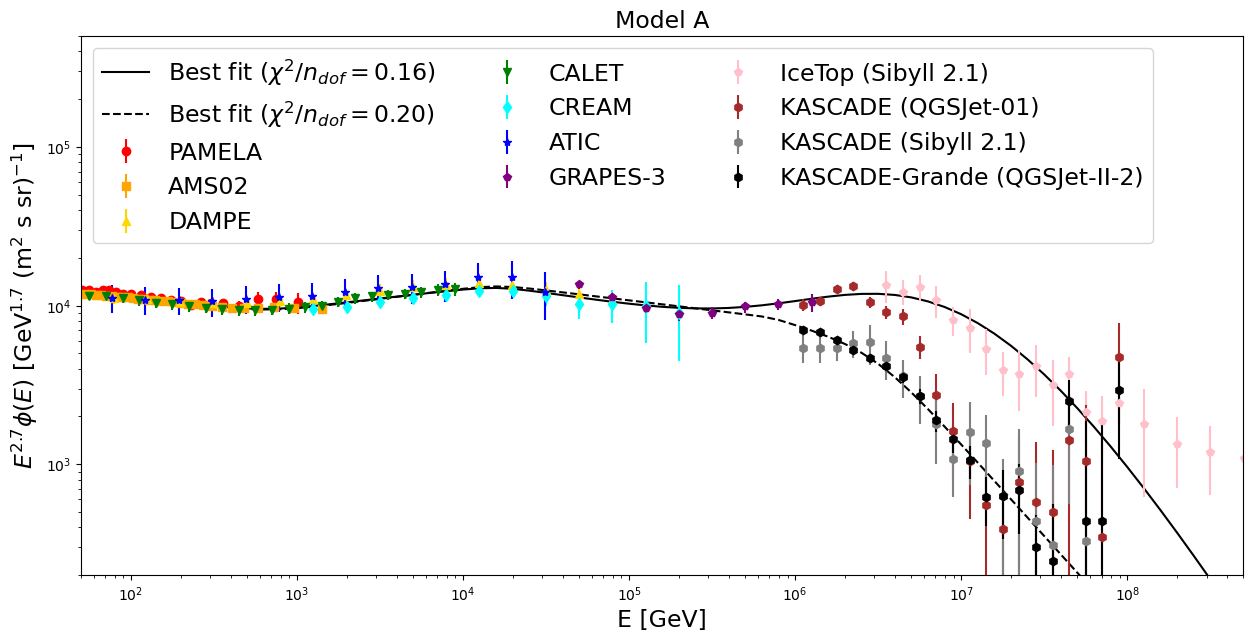

In [307]:
logE = np.arange(0,9,0.1)
E = 10**logE
Phi_model = Phi_A(E, best_fit_values[0], 0.1 * 1e3, 2.805, 2.56, best_fit_values[1], 0.6, best_fit_values[3], 0.28, 0.163, best_fit_values[4], best_fit_values[5], 0.670 * 1e3, 16 * 1e3, best_fit_values[6], best_fit_values[7])
Phi_model2 = Phi_A(E, best_fit_values2[0], 0.1 * 1e3, 2.805, 2.56, best_fit_values2[1], best_fit_values2[2], best_fit_values2[3], 0.28, 0.163, best_fit_values2[4], best_fit_values2[5], 0.670 * 1e3, 16 * 1e3, best_fit_values2[6], best_fit_values2[7])
plt.figure(figsize=(15, 7))
# Model
plt.plot(E, Phi_model * E**2.7, color='black', label=r'Best fit ($\chi^2 / n_{dof} = 0.16$)')
plt.plot(E, Phi_model2 * E**2.7, linestyle='--', color='black', label=r'Best fit ($\chi^2 / n_{dof} = 0.20$)')
# Low energy
plt.errorbar(E_PAMELA, flux_PAMELA * E_PAMELA**2.7, yerr=error_PAMELA * E_PAMELA**2.7, fmt='o', color='red', label='PAMELA')
plt.errorbar(E_AMS02, flux_AMS02 * E_AMS02**2.7, yerr=error_AMS02 * E_AMS02**2.7, fmt='s', color='orange', label='AMS02')
plt.errorbar(E_DAMPE, flux_DAMPE * E_DAMPE**2.7, yerr=error_DAMPE * E_DAMPE**2.7, fmt='^', color='gold', label='DAMPE')
plt.errorbar(E_CALET, flux_CALET * E_CALET**2.7, yerr=(error_CALET_low, error_CALET_low) * E_CALET**2.7, fmt='v', color='green', label='CALET')
plt.errorbar(E_CREAM, flux_CREAM * E_CREAM**2.7, yerr=(error_CREAM_low, error_CREAM_low) * E_CREAM**2.7, fmt='d', color='cyan', label='CREAM')
plt.errorbar(E_ATIC, flux_ATIC * E_ATIC**2.7, yerr=error_ATIC * E_ATIC**2.7, fmt='*', color='blue', label='ATIC')
# High energy
plt.errorbar(E_GRAPES, flux_GRAPES * E_GRAPES**2.7, yerr=(error_GRAPES_low, error_GRAPES_up) * E_GRAPES**2.7, fmt='p', color='purple', label='GRAPES-3')
plt.errorbar(E_ICECUBE, flux_ICECUBE * E_ICECUBE**2.7, yerr=(error_ICECUBE_low, error_ICECUBE_up) * E_ICECUBE**2.7, fmt='p', color='pink', label='IceTop (Sibyll 2.1)')
plt.errorbar(E_KASCADE_2005GQS, flux_KASCADE_2005GQS * E_KASCADE_2005GQS**2.7, yerr=error_KASCADE_2005GQS * E_KASCADE_2005GQS**2.7, fmt='h', color='brown', label='KASCADE (QGSJet-01)')
plt.errorbar(E_KASCADE_2005Sibyll, flux_KASCADE_2005Sibyll * E_KASCADE_2005Sibyll**2.7, yerr=(error_KASCADE_2005Sibyll_low, error_KASCADE_2005Sibyll_up) * E_KASCADE_2005Sibyll**2.7, fmt='h', color='gray', label='KASCADE (Sibyll 2.1)')
plt.errorbar(E_KASCADE_2011GQS, flux_KASCADE_2011GQS * E_KASCADE_2011GQS**2.7, yerr=(error_KASCADE_2011GQS_low, error_KASCADE_2011GQS_up)  * E_KASCADE_2011GQS**2.7, fmt='h', color='black', label='KASCADE-Grande (QGSJet-II-2)')
plt.loglog()
plt.xlim(5e1,5e8)
plt.ylim(2e2,5e5)
plt.xlabel('E [GeV]', fontsize=17)
plt.ylabel(r'$E^{2.7}\phi(E)$ [GeV$^{1.7}$ (m$^2$ s sr)$^{-1}$]', fontsize=17)
plt.legend(ncol=3, fontsize=17, loc='upper left')
plt.title('Model A', fontsize=17)
plt.savefig('/Users/luisenriqueespinosacastro/Documents/PhD/Research/Cosmic ray spectrum/Cosmic_Ray_Spectrum_Models/Plots/knee_modelA_fit.png')